In [1]:
# https://habr.com/ru/company/microsoft/blog/514814/

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def plot_dots(im,dots):
    img = np.zeros_like(im)
    for x in dots:
        cv2.circle(img,(int(x[0]),int(x[1])),1,(255,0,0))
    plt.imshow(img)

In [4]:
char_h = 32
char_w = 22
def slice(img):
    dy,dx = img.shape
    print(dy, dx)
    y = 0
    while y+char_h<dy:
        x=0
        while x+char_w<dx:
            # Корректируем сдвиг по x
            while np.max(img[y:y+char_h,x])>0:
                x+=1
            while np.max(img[y:y+char_h,x+char_w])>0:
                x-=1
            print(x, y)
            # Пропускаем полностью пустые символы
            if np.max(img[y:y+char_h,x:x+char_w])>0:
                yield img[y:y+char_h,x:x+char_w]
            x+=char_w
        y+=char_h

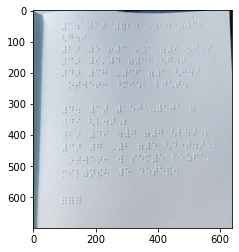

In [5]:
im = cv2.imread('Photo_Turlom_C1_2.jpeg')
im = im[:700, :]
plt.imshow(im)

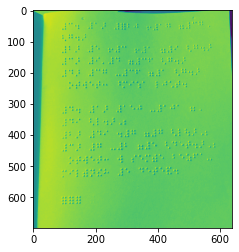

In [6]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(im)

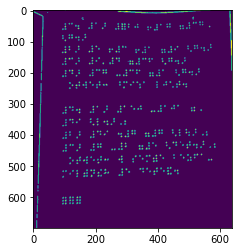

In [7]:
im = cv2.blur(im,(3,3))
im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                           cv2.THRESH_BINARY_INV, 5, 4)
im = cv2.medianBlur(im, 3)
_,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
im = cv2.GaussianBlur(im, (3,3), 0)
_,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)

plt.imshow(im)

In [8]:
orb = cv2.ORB_create(6000)
f,d = orb.detectAndCompute(im,None)

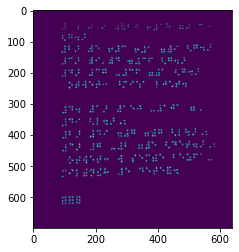

In [9]:
pts = [x.pt for x in f]
plot_dots(im,pts)

In [10]:
min_x, min_y, max_x, max_y = \
[int(f([z[i] for z in pts])) 
for f in (min,max) for i in (0,1)]

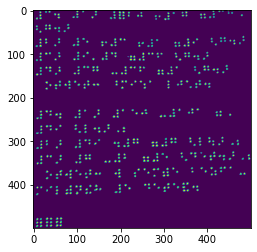

In [11]:
off = 5
src_pts = np.array([(min_x-off,min_y-off),(min_x-off,max_y+off),
                    (max_x+off,min_y-off),(max_x+off,max_y+off)])
dim = 500
dst_pts = np.array([(0,0),(0,dim),(dim,0),(dim,dim)])
h,m = cv2.findHomography(src_pts,dst_pts)
trim = cv2.warpPerspective(im,h,(dim,dim))
plt.imshow(trim)

In [12]:
#char_h = 22
#char_w = 16
sliced = list(slice(trim))

500 500
0 0
22 0
44 0
66 0
88 0
110 0
132 0
153 0
174 0
195 0
216 0
238 0
256 0
277 0
297 0
318 0
340 0
360 0
381 0
402 0
423 0
445 0
467 0
0 32
22 32
44 32
66 32
88 32
110 32
132 32
154 32
176 32
198 32
220 32
242 32
264 32
286 32
308 32
330 32
352 32
374 32
396 32
415 32
437 32
458 32
0 64
22 64
44 64
66 64
88 64
110 64
132 64
154 64
176 64
198 64
218 64
239 64
259 64
281 64
301 64
322 64
343 64
365 64
385 64
406 64
428 64
450 64
472 64
0 96
22 96
44 96
66 96
88 96
110 96
132 96
154 96
176 96
198 96
220 96
240 96
260 96
282 96
302 96
323 96
344 96
366 96
388 96
410 96
432 96
454 96
476 96
0 128
22 128
44 128
66 128
88 128
110 128
132 128
154 128
176 128
198 128
220 128
242 128
262 128
284 128
304 128
326 128
346 128
367 128
389 128
411 128
433 128
455 128
477 128
0 160
22 160
44 160
66 160
88 160
110 160
132 160
154 160
176 160
198 160
220 160
242 160
264 160
285 160
307 160
327 160
349 160
370 160
392 160
414 160
436 160
458 160
0 192
22 192
44 192
66 192
88 192
110 192
132 192
154 

True

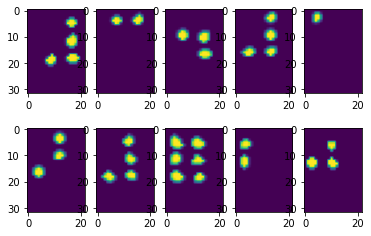

In [13]:
 
fig, axes = plt.subplots(2, 5)

axes[0][0].imshow(sliced[0])
axes[0][1].imshow(sliced[1])
axes[0][2].imshow(sliced[2])
axes[0][3].imshow(sliced[3])
axes[0][4].imshow(sliced[4])
axes[1][0].imshow(sliced[5])
axes[1][1].imshow(sliced[6])
axes[1][2].imshow(sliced[7])
axes[1][3].imshow(sliced[8])
axes[1][4].imshow(sliced[9])
cv2.imwrite('name.png', sliced[2])

In [14]:
from keras.models import Model,load_model
import numpy as np
from sklearn import preprocessing
import pandas as pd
from tensorflow.keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder as le

In [15]:
df=pd.read_csv('labels.csv',index_col=0)
encoder = preprocessing.LabelEncoder()
encoder.classes_ = np.array(df['0'])

In [16]:
model=load_model('BrailleNet_all_char.h5')

In [17]:
img=image.load_img('name.png')

In [18]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
model.predict(x)
a=encoder.inverse_transform(np.argmax(model.predict(x), axis=1))[0]

In [19]:
a

'0'

In [20]:
res = []
for i in range(10):
    cv2.imwrite('name.png', sliced[i])
    img=image.load_img('name.png')
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    model.predict(x)
    a=encoder.inverse_transform(np.argmax(model.predict(x), axis=1))[0]    
    res.append(a)

In [21]:
res

['5', '5', '0', '5', '5', '5', '5', '5', '0', '5']